**motivation**<br>
In this notebook we explain the basic idea of hypothesis testing. We will unpack questions such as "what should the sample size be so that the power of the test is 90% under the true mean of 77, with a significance level at 5%?". We follow Chapter 6 of <i>Introduction to Mathematical Statistics</i> by Robert Hogg and Allen Craig.

In [1]:
library(repr)
# set plot size
options(repr.plot.width=5, repr.plot.height=3)

Warning message:
“package ‘repr’ was built under R version 3.4.4”

In [2]:
# set up
# One sample from normal distribution, with known variance but unknown mean
mean=75  # in practice this is unknown
sd=10

**null hypothesis:** $mean\leq75$<br>

**alternative hypothesis:** $mean>75$<br>

**which hypothesis to accept?**
- use sampling to make a decision
- need a rule to make decisions based on sampling outcome
- such a rule is called a test of the null hypothesis against the alternative hypothesis

**test 1**<br>
sample 25 numbers, reject the null if and only if sample $mean > 75$<br>

If $mean\leq75$, what is the probability that $sample\:mean > 75$ so we mistakenly reject the null?<br>
sample mean follows $N(mean, sd/sqrt(25))$, therefore,<br>

\begin{align}
&prob(sample\:mean>75) \\
&= prob(sample\:mean - mean > 75 - mean) \\
&= prob((sample\:mean - mean)/(sd/sqrt(25)) > (75 - mean)/(sd/sqrt(25))) \\
&= 1-pnorm((75 - mean)/(sd/sqrt(25))) \\
\end{align}<br>
where $pnorm$ is the cumulative distribution function of the standard normal distribution in R.

In [3]:
# define a function to calculate this probability as a function of cutoff and mean
# this function is called the power function of the test
# cutoff: cutoff value we use to make a decision, in test 1 this is 75
# mean: true mean of the distribution
# return: probability of rejecting the null using cutoff under mean
k=function(cutoff, mean){
  1-pnorm((cutoff - mean)/(sd/sqrt(25)))
}
k(75, 75)
# it is too easy to reject the null when the null is true (type I error)
# need to revise the test to make it harder to reject the null

[1] 0.5

**test 2**<br>
sample 25 numbers, reject the null if and only if sample mean > 78

In [4]:
k(78, 75); # now it's hard to reject the null when the null is true
k(78, 77) # but it is too hard to reject the null when the null is false (type II error)
# the probability of rejecting the null when the null is false (mean = 77) is only 0.309

[1] 0.0668072

[1] 0.3085375

**test 3**<br>
can we find a balance? <br>
sample $n$ numbers, reject the null if and only if $sample\:mean > c$<br>
need to determine $n$ and $c$ to keep $k(c, 75)$ low and $k(c, 77)$ high simultaneously<br>
e.g. we want $k(c, 75)=0.159$ and $k(c, 77)=0.841$
\begin{align}
k(c, 75)&=1-pnorm((c - 75)/(sd/sqrt(n))) \\
k(c, 77)&=1-pnorm((c - 77)/(sd/sqrt(n))) \\
\end{align}<br>
solving the two equations with two unknowns, we have $c=76$ and $n=100$.

In [5]:
# Verify that k(c, 75)=0.159 and k(c, 77)=0.841
c=76
n=100
1-pnorm((c-75)/(sd/sqrt(n)))
1-pnorm((c-77)/(sd/sqrt(n)))

[1] 0.1586553

[1] 0.8413447

**significance level**<br>
probability of rejecting the null when the null is true: k(76, 75)=0.159<br>

**power**<br>
probability of rejecting the null when the alternative is true: k(76, 77)=0.841

**relation between sample size and power, holding significance level fixed**<br>
with $n=100$ and $c=76$, the significance level of our test is about 16%. for any sample size $n$, what should $c$ be so that the significance level is 5%?<br><br>
$$k(c, 75)=1-pnorm((c-75)/(sd/sqrt(n)))=0.05$$
solve for $c$,
$$c=75+qnorm(0.95)(sd/sqrt(n))$$

In [6]:
n=100
c=75+qnorm(0.95)*(sd/sqrt(n))

# verify that the significance level is indeed 5%
1-pnorm((c-75)/(sd/sqrt(n)))

[1] 0.05

what should n be so that the power of the test when mean=77 is 90%, with a significance level at 5%?<br><br>
$$k(c,77)=1-pnorm((c-77)/(sd/sqrt(n)))=0.9$$<br>
plugging $c=75+qnorm(0.95)(sd/sqrt(n))$ into the above question, solving for $n$, we have<br><br>
$$n=(sd^2)*((qnorm(0.95)+qnorm(0.9))^2)/((77-75)^2)$$


In [7]:
# the required sample size is
n=(sd^2)*((qnorm(0.95)+qnorm(0.9))^2)/((77-75)^2)
n

[1] 214.0962

In [8]:
# verify that with this sample size we indeed reject the null 90% of the time if mean=77
mean=77
sd=10
M=10000
sm=numeric(0)
reject=numeric(0)
for (i in 1:M) {
  sample=rnorm(n,mean,sd)
  sm[i]=mean(sample)
  c=75+qnorm(0.95)*(sd/sqrt(n))
  reject[i]=sm[i]>c
}

sum(reject)/M

[1] 0.9025

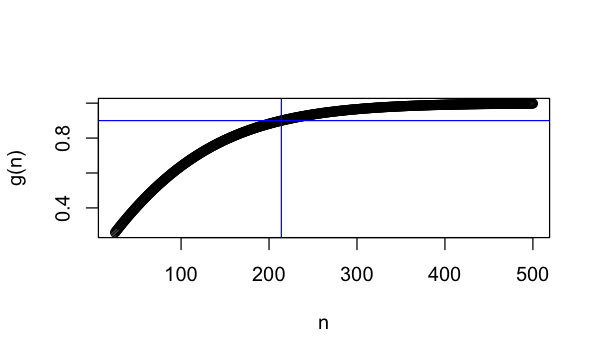

In [9]:
# what is the relation between sample size and power, holding significance level fixed at 0.05, under true mean of 77?
g=function(n){
  1-pnorm((75+qnorm(0.95)*(sd/sqrt(n))-77)/(sd/sqrt(n)))
}

n=seq(25,500,1)
plot(n,g(n))
abline(v=214, col="blue",lwd=1)
abline(h=0.9, col="blue",lwd=1)